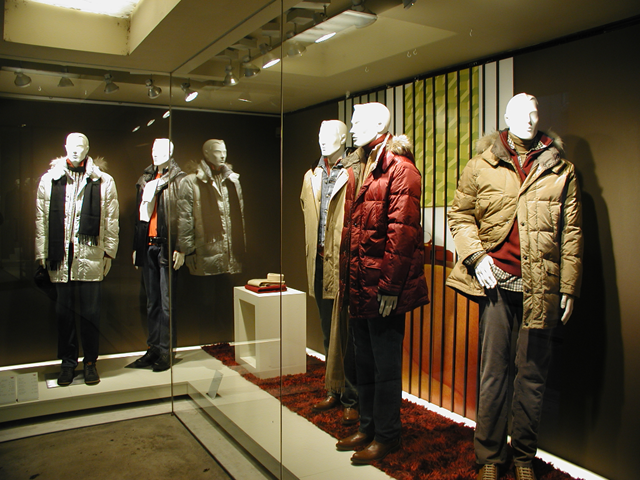

In [2]:
from IPython.display import Image
Image(filename='person.png')

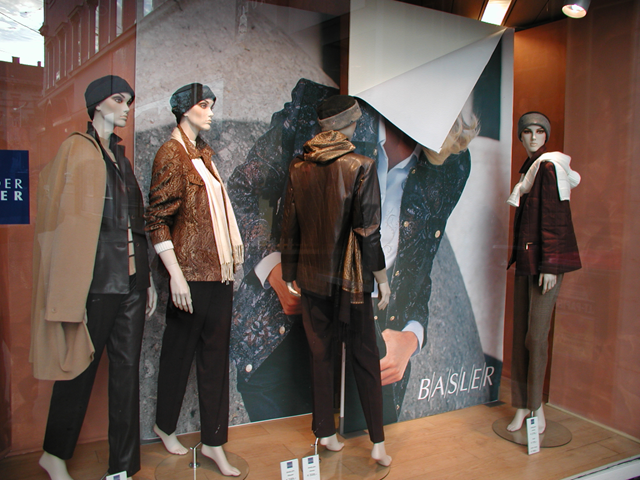

In [3]:
Image(filename='people2.png')

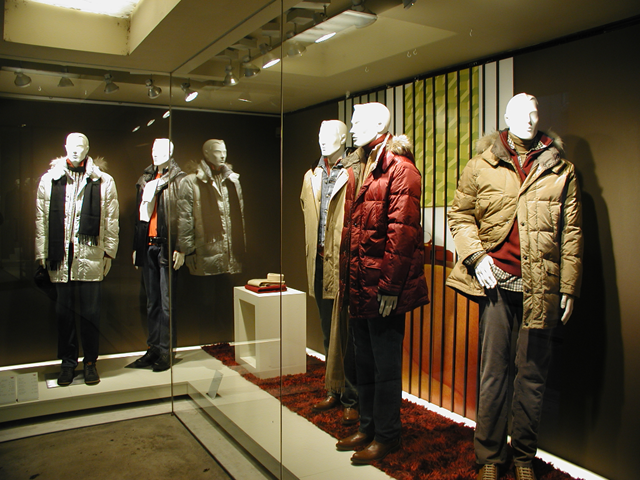

In [4]:
Image(filename='people.png')